In [1]:
import os 
os.chdir('./data/UTK/utkface_aligned_cropped')
os.chdir(r'C:\Users\Rajan\Documents\College Project\Sajon Clean\data\UTK\UTKFace')

In [2]:
onlyfiles = os.listdir()
len(onlyfiles)

23708

In [3]:
from random import shuffle
shuffle(onlyfiles)
age = [i.split('_')[0] for i in onlyfiles]

In [4]:
classes = []
for i in age:
    i = int(i)
    if i <= 14:
        classes.append(0)
    if (i>14) and (i<=25):
        classes.append(1)
    if (i>25) and (i<40):
        classes.append(2)
    if (i>=40) and (i<60):
        classes.append(3)
    if i>=60:
        classes.append(4)

In [5]:
from scipy import misc
import cv2
X_data =[]
for file in onlyfiles:
    face = cv2.imread(file)
    face =cv2.resize(face, (32, 32) )
    X_data.append(face)


In [6]:
import numpy as np 
X = np.squeeze(X_data)
X.shape

(23708, 32, 32, 3)

In [7]:
X = X.astype('float32')
X /= 255

In [8]:
from tensorflow.keras.utils import to_categorical
categorical_labels = to_categorical(classes, num_classes=5)

In [9]:
(x_train, y_train), (x_test, y_test) = (X[:15008],categorical_labels[:15008]) , (X[15008:] , categorical_labels[15008:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])


In [10]:
import tensorflow as tf 
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 32)          0

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
history = model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=25,
         validation_data=(x_valid, y_valid),)


Epoch 1/25
235/235 [==============================] - 7s 17ms/step - loss: 1.4142 - accuracy: 0.4084 - val_loss: 1.1930 - val_accuracy: 0.5053
Epoch 2/25
235/235 [==============================] - 3s 14ms/step - loss: 1.1585 - accuracy: 0.5087 - val_loss: 1.0620 - val_accuracy: 0.5427
Epoch 3/25
235/235 [==============================] - 3s 14ms/step - loss: 1.0835 - accuracy: 0.5427 - val_loss: 1.0117 - val_accuracy: 0.5544
Epoch 4/25
235/235 [==============================] - 3s 14ms/step - loss: 1.0422 - accuracy: 0.5591 - val_loss: 0.9882 - val_accuracy: 0.5800
Epoch 5/25
235/235 [==============================] - 3s 14ms/step - loss: 1.0167 - accuracy: 0.5694 - val_loss: 0.9794 - val_accuracy: 0.5651
Epoch 6/25
235/235 [==============================] - 3s 14ms/step - loss: 1.0019 - accuracy: 0.5710 - val_loss: 0.9442 - val_accuracy: 0.5894
Epoch 7/25
235/235 [==============================] - 3s 14ms/step - loss: 0.9772 - accuracy: 0.5808 - val_loss: 0.9475 - val_accuracy: 0.5939

In [23]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (16.0, 10.0)
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer

def plot_accuracy(history):
    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']
    plt.plot(training_accuracy,'r',linewidth=3.0)
    plt.plot(validation_accuracy,'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

def plot_loss(history):
  
  training_loss = history.history['loss']
  validation_loss = history.history['val_loss']
  plt.plot(training_loss,'m',linewidth=3.0)
  plt.plot(validation_loss,'c',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)
  plt.show()

    

          

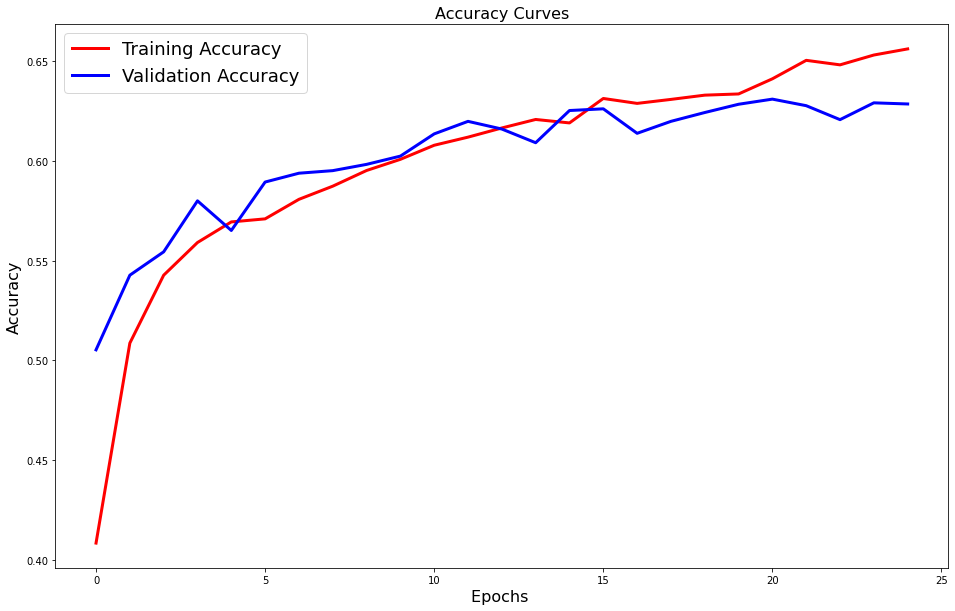

In [24]:
plot_accuracy(history)

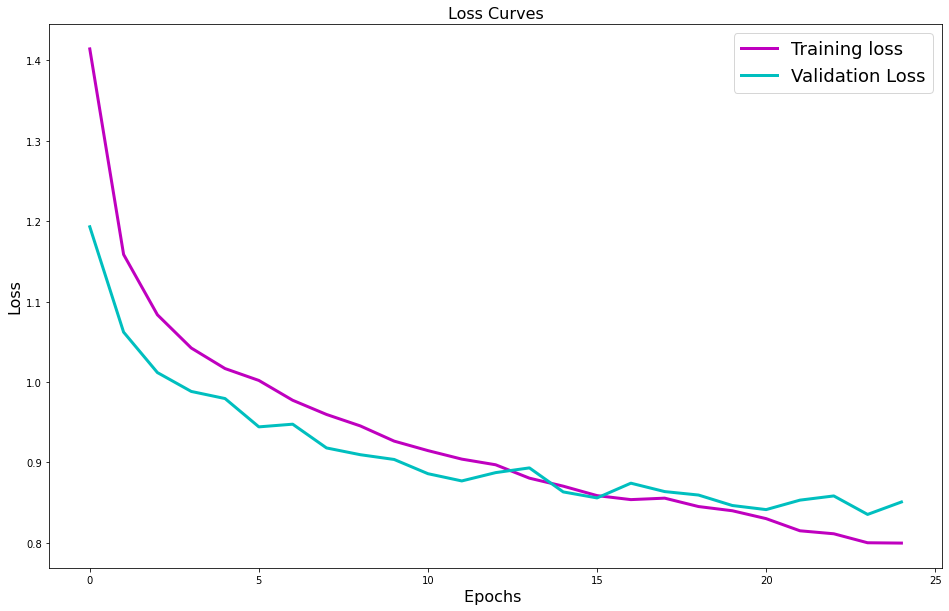

In [25]:
plot_loss(history)

In [27]:
model.save('./Model/AgeV2.h5')